# Logistic Regression

## Introduction

In this notebook, you will learn how to implement logistic regression on a dataset.

## Logistic Regression

Logistic regression is a statistical model that is used to predict the probability of an event. The probability is calculated by using the sigmoid function. The sigmoid function is defined as:

$$

\sigma(x) = \frac{1}{1 + e^{-x}}

$$

where $e$ is the base of the natural logarithm.

## Logistic Regression Algorithm

The logistic regression algorithm is used to predict the probability of an event.

## Conclusion

In this notebook, you have learned how to implement logistic regression on a dataset.
## logistic regression can be used for
1. binary classification
2. multi-class classification
3. one vs. all classification

## Asumptions of Logistic Regression

1. The dependent variable is binary
2. The dependent variable is either 0 or 1
3. The dependent variable is continuous
4. The independent variables are continuous
5. outliers are not present

In [49]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#seaborn
import seaborn as sns
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# standard scaler
from sklearn.preprocessing import StandardScaler
# label encoder
from sklearn.preprocessing import LabelEncoder
# confusion matrix
from sklearn.metrics import confusion_matrix
# accuracy
from sklearn.metrics import accuracy_score
# classification report
from sklearn.metrics import classification_report
# f1 score
from sklearn.metrics import f1_score



In [50]:
# import dataset titanic from seaborn
df = sns.load_dataset('titanic')
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [51]:
# data preprocessing
# remove deck column
df = df.drop('deck',axis=1)

# fill missing values
df['age'].fillna(df['age'].median(),inplace = True)
df['embarked'].fillna(df['embarked'].mode()[0],inplace = True)
#fare missing values
df['fare'].fillna(df['fare'].median(),inplace = True)
# embarked town
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace = True)

C:\Users\nhash\AppData\Local\Temp\ipykernel_5184\2114228246.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace = True)
C:\Users\nhash\AppData\Local\Temp\ipykernel_5184\2114228246.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [52]:
# encode categorical data using for loop where object and catagore datatyoes are present

for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

df


C:\Users\nhash\AppData\Local\Temp\ipykernel_5184\127836614.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
C:\Users\nhash\AppData\Local\Temp\ipykernel_5184\127836614.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
C:\Users\nhash\AppData\Local\Temp\ipykernel_5184\127836614.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
C:\Users\nhash\AppData\Local\Temp\ipykernel_5184\127836614.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.numb

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,2,1,22.0,1,0,7.2500,2,2,1,1,2,0,0
1,1,0,0,38.0,1,0,71.2833,0,0,2,0,0,1,0
2,1,2,0,26.0,0,0,7.9250,2,2,2,0,2,1,1
3,1,0,0,35.0,1,0,53.1000,2,0,2,0,2,1,0
4,0,2,1,35.0,0,0,8.0500,2,2,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,1,27.0,0,0,13.0000,2,1,1,1,2,0,1
887,1,0,0,19.0,0,0,30.0000,2,0,2,0,2,1,1
888,0,2,0,28.0,1,2,23.4500,2,2,2,0,2,0,0
889,1,0,1,26.0,0,0,30.0000,0,0,1,1,0,1,1


In [53]:
# X and y columns
X = df.drop('survived',axis=1)
y = df['survived']

In [54]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
#train model
model = LogisticRegression()
model.fit(X_train,y_train)

c:\Users\nhash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
# predict
y_pred = model.predict(X_test)


In [57]:
#evaluate model
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
# evaluate using F1 and confusion matrix
print(f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

1.0
[[105   0]
 [  0  74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

1.0
[[105   0]
 [  0  74]]


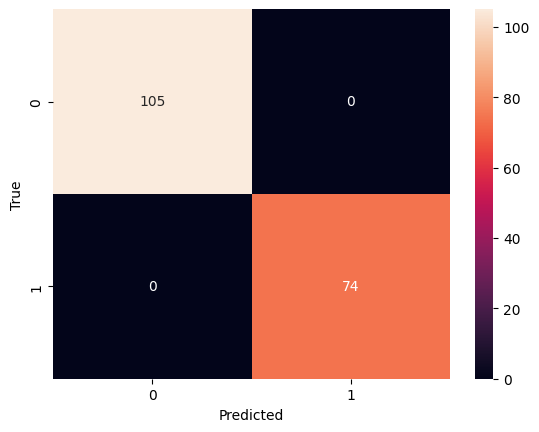

In [58]:
#plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [59]:
# save model
import pickle
pickle.dump(model, open('model.pkl', 'wb')) 